**Group 11 represents how to classify bad and good products in the dataset using Hugging Face Dataset and LLM.** 🤗

---




# 1.   Instaling libriaries if not installed: to work with langueage models (tranformers) and for easily accessing and preprocessing datasets (datasets)

In [ ]:
! pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.




---



# 2.   We load data from the [Hugging Face](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023).

In [ ]:
# Import load_dataset function (3 min )
from datasets import load_dataset

# Load the dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Video_Games", trust_remote_code=True)

# Check for dataset keys
print(ds.keys())

KeyboardInterrupt: 

In [ ]:
# Show the first few rows of the dataset (optional, just for preview)
ds["full"][:2]




---

# 3.   Count how many games there are reviewed


> An ASIN (Amazon Standard Identification Number) is a unique 10-character code used by Amazon to identify products in its catalog. Every product listed on Amazon has its own ASIN.

https://www.amazon.com/dp/...(ASIN input here)...





In [ ]:
# Import Counter function to count asins (16 sec)
from collections import Counter


# Gathering all asins
all_asins = [row for row in ds["full"]['asin']]

# Count of each appearence
asin_counts = Counter(all_asins)

# Count for duplicates, which will be used for sentiment analysis
duplicates = {asin: count for asin, count in asin_counts.items() if count > 1}

# Output results
print(f"Total ASINs: {len(all_asins)}")
print(f"Unique ASINs: {len(asin_counts)}")
print(f"ASIN Frequency: {asin_counts}")
print(f"Duplicate ASINs: {duplicates}")

Total ASINs: 4624615
Unique ASINs: 167645
ASIN Frequency: Counter({'B01N3ASPNV': 18105, 'B01H6GUCCQ': 16423, 'B004RMK5QG': 10256, 'B002VBWIP6': 8525, 'B00BGA9WK2': 8089, 'B00HTK1NCS': 6490, 'B005GFPZYK': 6051, 'B01LWVX2RG': 5787, 'B01NAWKYZ0': 5512, 'B00CQ35C1Q': 5380, 'B00NLZUM36': 5367, 'B00E4MQODC': 5149, 'B01NAUKS62': 5148, 'B00HVBPRUO': 5096, 'B07TC8J6HK': 4910, 'B01MS6MO77': 4863, 'B00DU2CHE2': 4725, 'B01LPZM7VI': 4723, 'B003DZ165W': 4671, 'B01L2ZRYVE': 4617, 'B06Y2LGTW3': 4604, 'B01GW3H3U8': 4498, 'B0050SYILE': 4443, 'B004QRKWLA': 4432, 'B07GBZ4Q68': 4390, 'B012DFI02O': 4374, 'B016MAK38U': 4285, 'B00FNKMVUO': 4266, 'B07SFKTLZM': 4254, 'B00SAYCXWG': 4155, 'B099VMT8VZ': 4135, 'B07C438TMN': 4096, 'B0015AARJI': 4095, 'B00BGA9X9W': 3993, 'B004VSTQ2A': 3990, 'B00DBDPOZ4': 3953, 'B0711K97BS': 3826, 'B00ZDNNRB8': 3814, 'B0086UK7IQ': 3787, 'B007FTE2VW': 3763, 'B01CDCG4KM': 3711, 'B00YXO5U40': 3710, 'B00EQNP8F4': 3699, 'B0050SXKU4': 3686, 'B07KXQX3S3': 3645, 'B076DWKD5B': 3643, '037586902

In [ ]:
# Sort each duplicates from big to small
sd_of_asins = dict(sorted(asin_counts.items(), key=lambda item: item[1], reverse=True))

# Check the output if needed
# sorted_dict



---

# 4. Loading LLM from Hugging Face for Sentiment Analysis

***Defualt***

In [ ]:
# Importing pipeline for accessing the models from Huggin Face
from transformers import pipeline

# Loading the LLM (DEFUALT)
sentiment_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


***Bertweet Model***

```
#finiteautomata/bertweet-base-sentiment-analysis
```

[Hugging Face LINK](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

[GITHUB LINK](https://github.com/pysentimiento/pysentimiento)

> @misc{perez2021pysentimiento,
      title={pysentimiento: A Python Toolkit for Opinion Mining and Social NLP tasks},
      author={Juan Manuel Pérez and Mariela Rajngewerc and Juan Carlos Giudici and Damián A. Furman and Franco Luque and Laura Alonso Alemany and María Vanina Martínez},
      year={2023},
      eprint={2106.09462},a
      archivePrefix={arXiv},
      primaryClass={cs.CL}
}


In [ ]:
# Importing pipeline for accessing the models from Huggin Face (49 sec)
from transformers import pipeline

BerTweet = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

***Bert based multilingual***



```
# nlptown/bert-base-multilingual-uncased-sentiment
```



[Hugging Face LINK](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment)

In [ ]:
Bert_Multi = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

# 5. Taking a fraction of dataset





> if working with random reviews not conected to each other. (Delete # before use)



In [ ]:
# ds_new = ds['full'].shuffle(seed=42).select(range(100))



> if classifiying specific product from the dataset



Picking random product

In [ ]:
# (Just Dance 4 - Nintendo Wii)
first_asin = list(sd_of_asins.keys())[100]
first_asin

'B0086V5UF0'

Attempt to collect all information which has the same asin

In [ ]:
# 8 min 28 seconds taken
first_asin_reviews = [row for row in ds["full"] if row['asin'] == first_asin]

In [ ]:
len(first_asin_reviews)

{'rating': 5.0,
 'title': 'Five Stars',
 'text': 'Grandkids love it.',
 'images': [],
 'asin': 'B0086V5UF0',
 'parent_asin': 'B0088TN7NW',
 'user_id': 'AHW4BAQ5WO3BFLJ2D4CLRIP2MS3A',
 'timestamp': 1528581512398,
 'helpful_vote': 0,
 'verified_purchase': True}

Optimizing using pandas

In [ ]:
# 48 seconds

# Importing libriary
import pandas as pd

# Converting to pandas data frame
df = ds['full'].to_pandas()





In [ ]:
# collecting all data
filtered_df = df[df['asin'] == first_asin]

In [ ]:
filtered_df

rating                                        title  \
2710        5.0                                   Five Stars   
4443        5.0                                   Just Dance   
5756        5.0                               Kids love this   
5924        5.0  My daughters play it every chance they get!   
8717        5.0                                 just dance 4   
...         ...                                          ...   
4015022     5.0                                    Muy bueno   
4015023     5.0                               What a workout   
4015024     2.0                                   Hit & Miss   
4015025     5.0                                   Five Stars   
4015027     5.0                                       Review   

                                                      text images        asin  \
2710                                    Grandkids love it.     []  B0086V5UF0   
4443     We love this more than the past versions.  It ...     []  B0086V5UF0   
5756     Love the dance programs. The kids use it more ...     []  B0086V5UF0   
5924     They (ages 10, 9 & 7) love the songs, the move...     []  B0086V5UF0   
8717     Grand kids have the whole selection of dance v...     []  B0086V5UF0   
...                                                    ...    ...         ...   
4015022  Excelente para jugar en familia y hacer compet...     []  B0086V5UF0   
4015023  Who knew such a game could be so much fun and ...     []  B0086V5UF0   
4015024  Recently received the new Just Dance 4 for Wii...     []  B0086V5UF0   
4015025                                        Great deal!     []  B0086V5UF0   
4015027  My kids love it and haven't stopped playing si...     []  B0086V5UF0   

        parent_asin                       user_id      timestamp  \
2710     B0088TN7NW  AHW4BAQ5WO3BFLJ2D4CLRIP2MS3A  1528581512398   
4443     B0088TN7NW  AGJBD7SZRK4ZWM6SBE6R4AYUZCYQ  1359507388000   
5756     B0088TN7NW  AGHXG7YY4D3NYEVZWQMNG2LHYV6A  1364735500000   
5924     B0088TN7NW  AH2KO7J3EI3NLLO3OFJLJ57CNF3Q  1358383644000   
8717     B0088TN7NW  AFU7JUYYE6IHK6JXUJOVMHI2XMNQ  1356568756000   
...             ...                           ...            ...   
4015022  B0088TN7NW  AHJDTGBJ6AH6REVYBJL3YPL3AIQQ  1356753600000   
4015023  B0088TN7NW  AHFPJTHA7CUISKIUYUXDZXPI44LQ  1377133818000   
4015024  B0088TN7NW  AEKGLRRDZ7MJZU2FU4VDMRP6TP2A  1349877065000   
4015025  B0088TN7NW  AFKQSFB6M5MBGR4ZXH5RBXULTBFA  1422989260000   
4015027  B0088TN7NW  AGCMYSX6IY4XJ43IVC2ETRZWWNFQ  1357160416000   

         helpful_vote  verified_purchase  
2710                0               True  
4443                0               True  
5756                0               True  
5924                0               True  
8717                0               True  
...               ...                ...  
4015022             0              False  
4015023             0               True  
4015024            12              False  
4015025             0               True  
4015027             0               True  

[2267 rows x 10 columns]

# 6.   Default Model



In [ ]:
# To get rud if punctuation and emojis
import re

# Example of text preprocessing
def preprocess_text(text):
    # Lowercasing and other preprocessing if needed
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
    return text




In [ ]:
# Perform sentiment analysis on the sample (3min 31sec)
results = filtered_df['text'].apply(lambda text: sentiment_analyzer(preprocess_text(text), truncation=True)[0])
results

2710       {'label': 'POSITIVE', 'score': 0.999880313873291}
4443       {'label': 'POSITIVE', 'score': 0.9997492432594...
5756       {'label': 'POSITIVE', 'score': 0.9994081258773...
5924       {'label': 'POSITIVE', 'score': 0.9765748381614...
8717       {'label': 'POSITIVE', 'score': 0.9996090531349...
                                 ...                        
4015022    {'label': 'POSITIVE', 'score': 0.9787953495979...
4015023    {'label': 'NEGATIVE', 'score': 0.9989320635795...
4015024    {'label': 'NEGATIVE', 'score': 0.9946773052215...
4015025    {'label': 'POSITIVE', 'score': 0.999849796295166}
4015027    {'label': 'POSITIVE', 'score': 0.9995312690734...
Name: text, Length: 2267, dtype: object

Evaluating perfomance

In [ ]:
# Assuming the dataset has a 'rating' column with the true sentiment labels
true_labels = filtered_df['rating']  # Actual labels

# Convert the true labels to match the model's label format (e.g., 0 = 'NEGATIVE', 1 = 'POSITIVE')
true_labels_mapped = ['POSITIVE' if rating >= 4 else 'NEGATIVE' if rating < 3 else 'NEUTRAL' for rating in true_labels]

# Predicted labels, ensure they are in the same format ('POSITIVE', 'NEGATIVE')
predicted_labels = [result['label'] for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels_mapped,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

True Label Predicted Label  Confidence Score
0      POSITIVE         5 stars          0.790380
1      POSITIVE         5 stars          0.747898
2      POSITIVE         5 stars          0.708893
3      POSITIVE         4 stars          0.584352
4      POSITIVE         5 stars          0.566733
...         ...             ...               ...
2262   POSITIVE         5 stars          0.800713
2263   POSITIVE         5 stars          0.377666
2264   NEGATIVE         2 stars          0.497007
2265   POSITIVE         5 stars          0.831957
2266   POSITIVE         5 stars          0.572314

[2267 rows x 3 columns]

Accuracy and Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(true_labels_mapped, predicted_labels)
f"Accuracy: {accuracy * 100:.2f}%"

'Accuracy: 87.69%'

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_mapped, predicted_labels, labels=['POSITIVE', 'NEGATIVE'])
conf_matrix

array([[1926,  274],
       [   5,   62]])

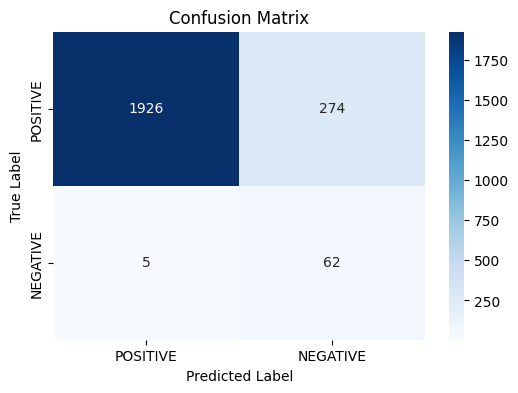

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


As long as True Positive reviews more than True Negative, we consider this product Good.

If True Negative reviews more than True Positive, then we condider product as Bad.

# 7. BerTweet Model

**Installing libraries for preprocessing**

In [ ]:
!pip install pysentimiento
from pysentimiento.preprocessing import preprocess_tweet

**Preprocessing text**

In [ ]:
# 8 min 21 sec
results = filtered_df['text'].apply(lambda text: BerTweet(preprocess_tweet(text, shorten=2, lang='en' ), truncation=True)[0])
results

KeyboardInterrupt: 

**Evaluating perfomance**

In [ ]:
# Assuming the dataset has a 'rating' column with the true sentiment labels
true_labels = filtered_df['rating']  # Actual labels

# Convert the true labels to match the model's label format (e.g., 0 = 'NEGATIVE', 1 = 'POSITIVE')
true_labels_mapped = ['POSITIVE' if rating >= 4 else 'NEGATIVE' if rating < 3 else 'NEUTRAL' for rating in true_labels]

# Predicted labels, ensure they are in the same format ('POSITIVE', 'NEGATIVE')
predicted_labels = ['POSITIVE' if result['label'] == 'POS' else 'NEGATIVE' if result['label'] == 'NEG' else result['label'] for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels_mapped,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

True Label Predicted Label  Confidence Score
0      POSITIVE         5 stars          0.790380
1      POSITIVE         5 stars          0.747898
2      POSITIVE         5 stars          0.708893
3      POSITIVE         4 stars          0.584352
4      POSITIVE         5 stars          0.566733
...         ...             ...               ...
2262   POSITIVE         5 stars          0.800713
2263   POSITIVE         5 stars          0.377666
2264   NEGATIVE         2 stars          0.497007
2265   POSITIVE         5 stars          0.831957
2266   POSITIVE         5 stars          0.572314

[2267 rows x 3 columns]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(true_labels_mapped, predicted_labels)
f"Accuracy: {accuracy * 100:.2f}%"

'Accuracy: 93.12%'

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_mapped, predicted_labels, labels=['POSITIVE', 'NEGATIVE'])
conf_matrix

array([[2059,   49],
       [   9,   52]])

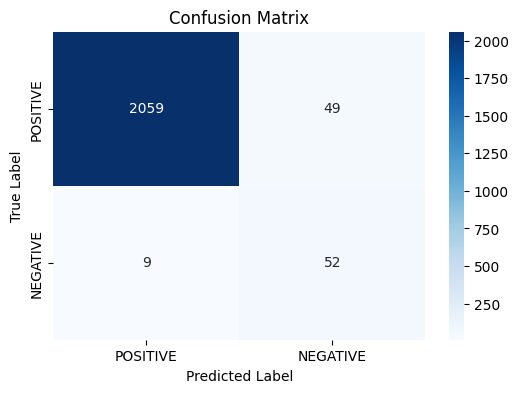

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


As long as True Positive reviews more than True Negative, we consider this product Good.

If True Negative reviews more than True Positive, then we condider product as Bad.




> Should be mentioned, that while the model covering NEUTRAL state of review, it is not covered in rating assessment. That is why our accuracy could be decreased.



# 8.   Bert Base Multilingual



In [ ]:
# 8 min 21 sec
results = filtered_df['text'].apply(lambda text: Bert_Multi(text, truncation=True)[0])
results

2710       {'label': '5 stars', 'score': 0.7903801202774048}
4443       {'label': '5 stars', 'score': 0.7478981614112854}
5756       {'label': '5 stars', 'score': 0.7088931202888489}
5924       {'label': '4 stars', 'score': 0.5843521952629089}
8717       {'label': '5 stars', 'score': 0.5667325258255005}
                                 ...                        
4015022    {'label': '5 stars', 'score': 0.8007132411003113}
4015023    {'label': '5 stars', 'score': 0.3776659667491913}
4015024    {'label': '2 stars', 'score': 0.49700745940208...
4015025    {'label': '5 stars', 'score': 0.8319571614265442}
4015027    {'label': '5 stars', 'score': 0.5723137855529785}
Name: text, Length: 2267, dtype: object

**Evaluating perfomance**

In [ ]:
# Assuming the dataset has a 'rating' column with the true sentiment labels
true_labels = filtered_df['rating']  # Actual labels

# Convert the true labels to match the model's label format (e.g., 0 = 'NEGATIVE', 1 = 'POSITIVE')
true_labels_mapped = ['POSITIVE' if rating >= 4 else 'NEGATIVE' if rating < 3 else 'NEUTRAL' for rating in true_labels]

# Predicted labels, ensure they are in the same format ('POSITIVE', 'NEGATIVE')
predicted_labels = ['POSITIVE' if result['label'] in ('5 stars', '4 stars') else
                    'NEUTRAL' if result['label'] in ('3 stars', '2 stars') else
                    'NEGATIVE' if result['label'] == '1 star' else
                    result['label']  # Keep original label if not in the defined categories
                    for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels_mapped,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

True Label Predicted Label  Confidence Score
0      POSITIVE        POSITIVE          0.790380
1      POSITIVE        POSITIVE          0.747898
2      POSITIVE        POSITIVE          0.708893
3      POSITIVE        POSITIVE          0.584352
4      POSITIVE        POSITIVE          0.566733
...         ...             ...               ...
2262   POSITIVE        POSITIVE          0.800713
2263   POSITIVE        POSITIVE          0.377666
2264   NEGATIVE         NEUTRAL          0.497007
2265   POSITIVE        POSITIVE          0.831957
2266   POSITIVE        POSITIVE          0.572314

[2267 rows x 3 columns]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(true_labels_mapped, predicted_labels)
f"Accuracy: {accuracy * 100:.2f}%"

'Accuracy: 93.82%'

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels_mapped, predicted_labels, labels=['POSITIVE', 'NEGATIVE'])
conf_matrix

array([[2034,   12],
       [   3,   28]])

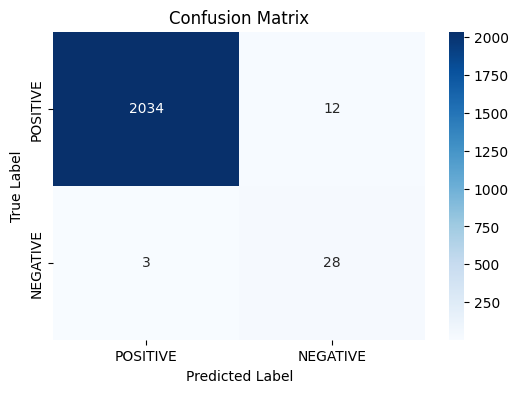

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

As long as True Positive reviews more than True Negative, we consider this product Good.

If True Negative reviews more than True Positive, then we condider product as Bad.